In [3]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller, kpss

#### Exercise 1

Given
$$
\Delta(Y_{1,t} - \lambda Y_{2,t}) = (\phi_1 - \lambda \phi_2)(Y_{1,t-1} - \lambda Y_{2,t-1}) + (\epsilon_{1,t} - \lambda \epsilon_{2,t}),
$$
we have
$$
Y_{1,t} - \lambda Y_{2,t} - (Y_{1,t-1} - \lambda Y_{2,t-1}) = (\phi_1 - \lambda \phi_2)(Y_{1,t-1} - \lambda Y_{2,t-1}) + (\epsilon_{1,t} - \lambda \epsilon_{2,t}),
$$
so
$$
Y_{1,t} - \lambda Y_{2,t} = (1 + \phi_1 - \lambda \phi_2)(Y_{1,t-1} - \lambda Y_{2,t-1}) + \epsilon'_t,
$$
where $\epsilon'_t = \epsilon_{1,t} - \lambda \epsilon_{2,t} \sim N(0, 1+\lambda^2)$ as a linear combination of normal variables. The last equation is AR(1) for $Y_{1,t-1} - \lambda Y_{2,t-1}$ with $\mu = 0$ and $\phi = 1 + \phi_1 - \lambda \phi_2$.

#### Exercise 2

Let 
$$
\Delta Y_{1,t} = \phi_1 (Y_{1,t-1} - \lambda Y_{2,t-1}) + \mu_1 + \epsilon_{1,t} \\
\Delta Y_{2,t} = \phi_2 (Y_{1,t-1} - \lambda Y_{2,t-1}) + \mu_2 + \epsilon_{2,t} \\
$$
Then
$$\Delta Y_{1,t} - \lambda \Delta Y_{2,t} = (\phi_1 - \lambda \phi_2)(Y_{1,t-1} - \lambda Y_{2,t-1}) + \mu_1 - \lambda \mu_2 + \epsilon_{1,t} - \lambda \epsilon_{2,t}.$$
On the other hand,
$$\Delta Y_{1,t} - \lambda \Delta Y_{2,t} = Y_{1,t} - \lambda Y_{2,t} - (Y_{1,t-1} - \lambda Y_{2,t-1}),$$
so $$Y_{1,t} - \lambda Y_{2,t} = (1 + \phi_1 - \lambda \phi_2)(Y_{1,t-1} - \lambda Y_{2,t-1}) + \mu_1 - \lambda \mu_2 + \epsilon_{1,t} - \lambda \epsilon_{2,t}.$$

Comparing this to an AR(1) model for $Y_{1,t} - \lambda Y_{2,t}$:
$$Y_{1,t} - \lambda Y_{2,t} - \mu = \phi(Y_{1,t-1} - \lambda Y_{2,t-1} - \mu) + \epsilon_t,$$
we need to set $\phi = 1 + \phi_1 - \lambda \phi_2$ and $\epsilon_t = \epsilon_{1,t} - \lambda \epsilon_{2,t}$ as before and $\mu$ such that
$$\mu - \phi \mu + \mu_1 - \lambda \mu_2 = 0,$$
from which we get
$$\mu = \frac{\mu_1 - \lambda \mu_2}{\phi - 1} = \frac{\mu_1 - \lambda \mu_2}{\phi_1 - \lambda \phi_2}.$$

#### Exercise 3

In [4]:
rng = np.random.default_rng(12345)

In [5]:
n = 5000
a1 = 0.5
a2 = 0.55
lam = 1
y1 = np.zeros(n)
y2 = np.zeros(n)
e1 = rng.normal(size=n)
e2 = rng.normal(size=n)
for i in range(1, n):
    y1[i] = y1[i - 1] + a1 * (y1[i - 1] - lam * y2[i - 1]) + e1[i]
    y2[i] = y2[i - 1] + a2 * (y1[i - 1] - lam * y2[i - 1]) + e2[i]

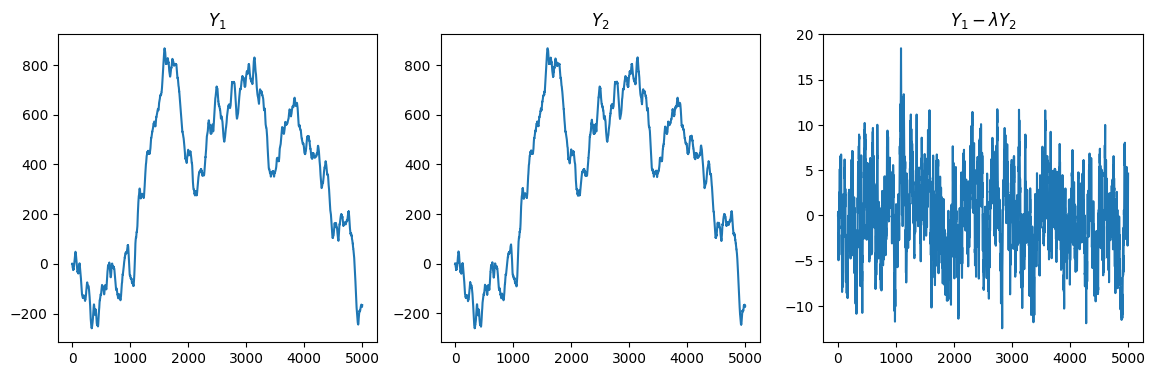

In [6]:
fix, axs = plt.subplots(1, 3, figsize=(14, 4))
axs[0].plot(y1);
axs[0].set_title('$Y_1$');
axs[1].plot(y2);
axs[1].set_title('$Y_2$');
axs[2].plot(y1 - lam * y2);
axs[2].set_title('$Y_1 - \\lambda Y_2$');

In order to verify stationarity, we perform KPSS test:

In [7]:
kpss(y1 - lam * y2, nlags=4, regression='c')  #  the parameters are set to match the behaviour in R

/home/artem/Study/SDAFE/venv/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(2.3141056247911345,
 0.01,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

KPSS rejects the hypothesis of stationarity.

#### Exercise 4

Using the notation of section 13.4.4,
$$\mathbf{\Phi}_1 = \mathbf{\alpha} \mathbf{\beta}'= \begin{pmatrix}
\phi_1 & -\lambda \phi_1 \\
\phi_2 & -\lambda \phi_2 \\
\end{pmatrix}$$
and the condition of stationarity is that the eigenvalues of $\mathbf{\Phi}_1$ are all less than 1 in absolute value is satisfied:

In [10]:
np.abs(np.linalg.eig(np.array([[a1, -lam * a1], [a2, -lam * a2]]))[0])

array([4.4408921e-16, 5.0000000e-02])